In [1]:
%matplotlib inline 
import xarray as xray
import os
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from dfm_functions import make_map, make_mask, cmap_discretize

models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
scenario = "historical"
time_period = "1950_2005"
for model in models:
    direc = '/raid9/gergel/agg_snowpack/goodleap/great_basin'
    filename = '%s__%s.monsum.pr.%s_great_basin_mam.nc' % (model, scenario, time_period) # 1950_2005, 2006_2099
    print(model)
    ds = xray.open_dataset(os.path.join(direc, filename))
    ds['Latitude'] = np.round(ds['Latitude'], 5) 
    
    if (model == "CNRM-CM5"): 
        ds_tot = ds
    else:
        ds_tot += ds

# calculate ens avg 
ens_avg = ds_tot / 10.0 
ds_hist = ens_avg 

CNRM-CM5
NorESM1-M
IPSL-CM5A-MR
CanESM2
CCSM4
HadGEM2-CC365
HadGEM2-ES365
MIROC5
bcc-csm1-1-m
CSIRO-Mk3-6-0


In [3]:
scenario = "rcp45"
time_period = "2006_2099"

for model in models:
    direc = '/raid9/gergel/agg_snowpack/goodleap/great_basin'
    filename = '%s__%s.monsum.pr.%s_great_basin_mam.nc' % (model, scenario, time_period) # 1950_2005, 2006_2099
    print(model)
    ds = xray.open_dataset(os.path.join(direc, filename))
    ds['Latitude'] = np.round(ds['Latitude'], 5) 

    if (model == "CNRM-CM5"): 
        ds_tot = ds
    else:
        ds_tot += ds

# calculate ens avg 
ens_avg = ds_tot / 10.0 
ds_rcp45 = ens_avg 

CNRM-CM5
NorESM1-M
IPSL-CM5A-MR
CanESM2
CCSM4
HadGEM2-CC365
HadGEM2-ES365
MIROC5
bcc-csm1-1-m
CSIRO-Mk3-6-0


In [4]:
scenario = "rcp85"
time_period = "2006_2099"

for model in models:
    direc = '/raid9/gergel/agg_snowpack/goodleap/great_basin'
    filename = '%s__%s.monsum.pr.%s_great_basin_mam.nc' % (model, scenario, time_period) # 1950_2005, 2006_2099
    ds = xray.open_dataset(os.path.join(direc, filename))
    ds['Latitude'] = np.round(ds['Latitude'], 5) 
    
    if (model == "CNRM-CM5"): 
        ds_tot = ds
    else:
        ds_tot += ds 

# calculate ens avg 
ens_avg = ds_tot / 10.0 
ds_rcp85 = ens_avg 

In [5]:
# mask domain
mask_domain = make_mask('/raid9/gergel/agg_snowpack/gridcells_is_paper/all_regions', ds.Latitude, ds.Longitude)
ds_hist = ds_hist.where(mask_domain == 1)
ds_rcp45 = ds_rcp45.where(mask_domain == 1)
ds_rcp85 = ds_rcp85.where(mask_domain == 1)
ds_hist = ds_hist.sel(Latitude=slice(31,49.03), Longitude=slice(ds.Longitude.min(), 
                                                                            ds.Longitude.max()))
ds_rcp45 = ds_rcp45.sel(Latitude=slice(31,49.03), Longitude=slice(ds.Longitude.min(), 
                                                                            ds.Longitude.max()))
ds_rcp85 = ds_rcp85.sel(Latitude=slice(31,49.03), Longitude=slice(ds.Longitude.min(), 
                                                                            ds.Longitude.max()))

## make figure ## 

In [6]:
# (ds_rcp45['precipitation'].sum('Time') - ds_hist['precipitation'].sum('Time')).plot()

In [7]:
'''ds_hist['precipitation'].sum('Time').plot()'''

"ds_hist['precipitation'].sum('Time').plot()"

saving figure to /raid9/gergel/agg_snowpack/climatology/plots/pr_spring_lowlands.tiff


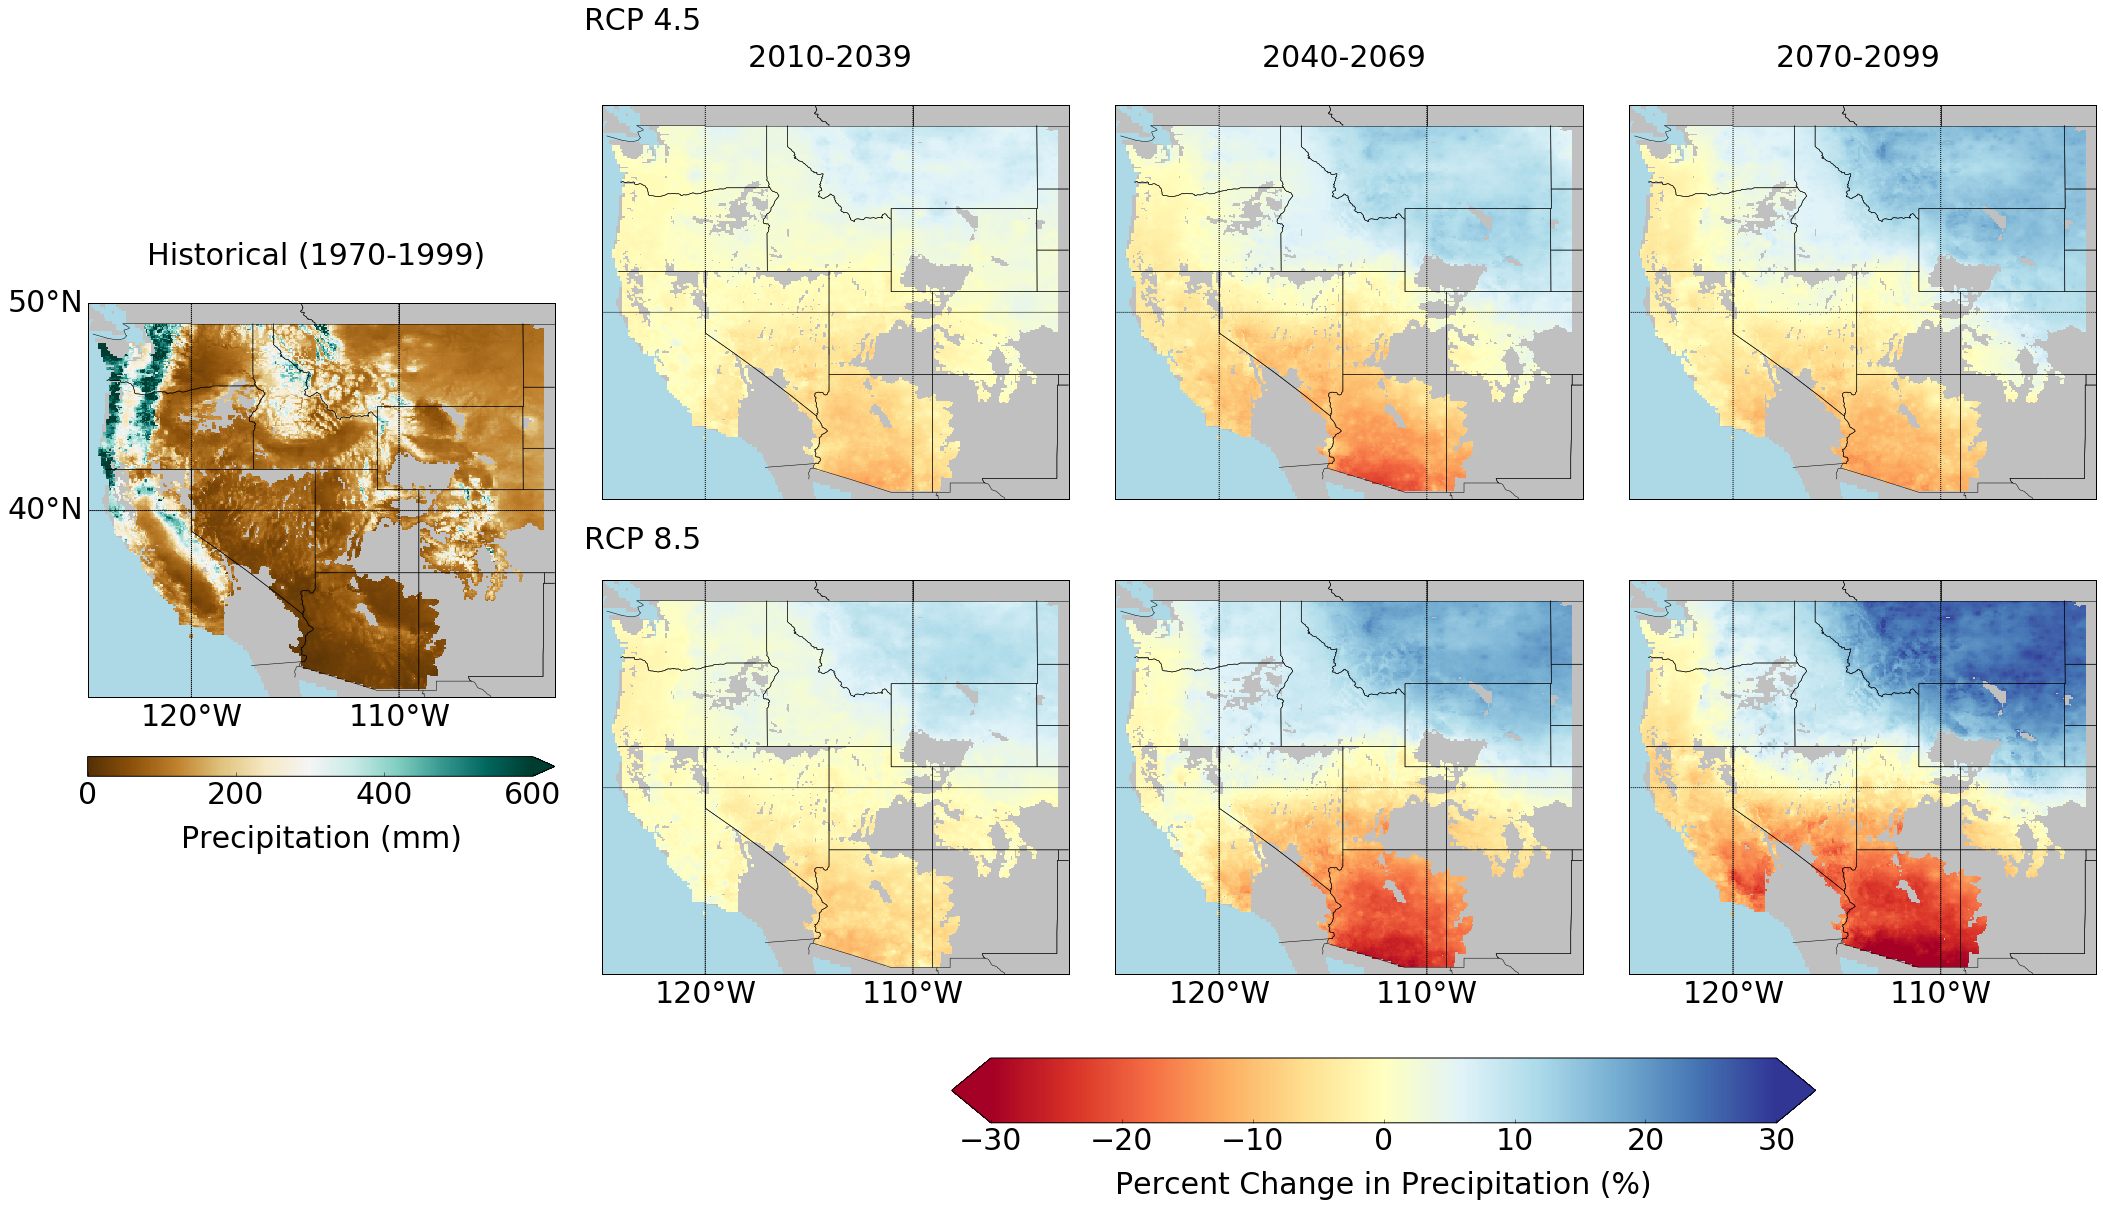

In [8]:
from pylab import *

chunks = ["2010-2039","2040-2069","2070-2099","2010-2039","2040-2069","2070-2099","Historical (1970-1999)"] 
scenarios = ["rcp45","rcp45","rcp45","rcp85","rcp85","rcp85","historical"] 

sps = np.asarray([2,3,4,6,7,8,9])

lt = 30
rt = 18

fig = plt.figure(figsize=(lt,rt))

fs = 30
lp = 15
dpi = 600

ds_hist_m = ds_hist['precipitation'].sel(Time=slice('1969-10-1', '1999-9-30'))
ds_avg_h = ds_hist_m.sum('Time') / 30.0 

vmin_h = 0
vmax_h = 600
vmin = -30
vmax = 30
cmap_hist = cmap_discretize(plt.cm.BrBG, 4) 
cmap_fut = plt.cm.RdYlBu

for num in np.arange(len(chunks)):

    if sps[num] < 9: 
        ax = fig.add_subplot(2,4,sps[num]) ## add subplots 
    else: 
        ax = fig.add_subplot(1,4,1)
    
    if sps[num] == 9: 
        m = make_map(fs, label_parallels=True, label_meridians=True)
    elif sps[num] < 5: 
        m = make_map(fs)
    elif sps[num] > 5 and sps[num] < 9: 
        m = make_map(fs, label_meridians=True)
    
    if (sps[num] < 5) or (sps[num] == 9):
        ax_title = '%s \n ' % chunks[num]
        ax.set_title(ax_title, fontsize=fs) ## titles for top row of figures 

    if (sps[num] == 9):
        '''ds_hist_m = ds_hist['precipitation'].sel(Time=slice('1969-10-1', '1999-9-30'))
        ds_avg = ds_hist_m.sum('Time') / 30.0''' 
        x,y = m(ds_avg_h.Longitude, ds_avg_h.Latitude)
        # arr = ds_avg_h.where(mask_domain == 1)
        img_hist = m.pcolormesh(x, y, ds_avg_h.where(ds_avg_h > 0).to_masked_array(), cmap='BrBG', vmin=vmin_h, vmax=vmax_h)
    elif (sps[num] == 2):
        ds_fut = ds_rcp45['precipitation'].sel(Time=slice('2009-10-1', '2039-9-30'))
        ds_avg_fut = ds_fut.sum('Time') / 30.0 
        x,y = m(ds_avg_fut.Longitude, ds_avg_fut.Latitude)
        arr = ((ds_avg_fut - ds_avg_h) / ds_avg_h ) * 100.0 
        img_fut = m.pcolormesh(x, y, arr.to_masked_array(), cmap=cmap_fut, vmin=vmin, vmax=vmax)
    elif (sps[num] == 3): 
        ds_fut = ds_rcp45['precipitation'].sel(Time=slice('2039-10-1', '2069-9-30'))
        ds_avg_fut = ds_fut.sum('Time') / 30.0 
        x,y = m(ds_avg_fut.Longitude, ds_avg_fut.Latitude)
        arr = ((ds_avg_fut - ds_avg_h) / ds_avg_h) * 100.0 
        img_fut = m.pcolormesh(x, y, arr.to_masked_array(), cmap=cmap_fut, vmin=vmin, vmax=vmax)
    elif (sps[num] == 4): 
        ds_fut = ds_rcp45['precipitation'].sel(Time=slice('2069-10-1', '2099-9-30'))
        ds_avg_fut = ds_fut.sum('Time') / 30.0 
        x,y = m(ds_avg_fut.Longitude, ds_avg_fut.Latitude)
        arr = ((ds_avg_fut - ds_avg_h) / ds_avg_h) * 100.0 
        img_fut = m.pcolormesh(x, y, arr.to_masked_array(), cmap=cmap_fut, vmin=vmin, vmax=vmax)
    elif (sps[num] == 6): 
        ds_fut = ds_rcp85['precipitation'].sel(Time=slice('2009-10-1', '2039-9-30'))
        ds_avg_fut = ds_fut.sum('Time') / 30.0 
        x,y = m(ds_avg_fut.Longitude, ds_avg_fut.Latitude)
        arr = ((ds_avg_fut - ds_avg_h) / ds_avg_h) * 100.0 
        img_fut = m.pcolormesh(x, y, arr.to_masked_array(), cmap=cmap_fut, vmin=vmin, vmax=vmax)
    elif (sps[num] == 7): 
        ds_fut = ds_rcp85['precipitation'].sel(Time=slice('2039-10-1', '2069-9-30'))
        ds_avg_fut = ds_fut.sum('Time') / 30.0 
        x,y = m(ds_avg_fut.Longitude, ds_avg_fut.Latitude)
        arr = ((ds_avg_fut - ds_avg_h) / ds_avg_h) * 100.0 
        img_fut = m.pcolormesh(x, y, arr.to_masked_array(), cmap=cmap_fut, vmin=vmin, vmax=vmax)
    elif (sps[num] == 8): 
        ds_fut = ds_rcp85['precipitation'].sel(Time=slice('2069-10-1', '2099-9-30'))
        ds_avg_fut = ds_fut.sum('Time') / 30.0 
        x,y = m(ds_avg_fut.Longitude, ds_avg_fut.Latitude)
        arr = ((ds_avg_fut - ds_avg_h) / ds_avg_h ) * 100.0 
        img_fut = m.pcolormesh(x, y, arr.to_masked_array(), cmap=cmap_fut, vmin=vmin, vmax=vmax)
        
    if (scenarios[num] == "historical"): 
        cbar = m.colorbar(img_hist, location = 'bottom', pad='15%', extend='max')
        cbar.set_ticks([0, 200, 400, 600, 800])
        cbar.set_label('Precipitation (mm)', size=fs, labelpad=lp)
        cbar.ax.tick_params(labelsize=fs)

cax1 = plt.axes([0.45, 0.1, 0.4, 0.05]) # [left,vertical, distance from left, height]

# elif (scenarios[num] != "historical") and sps[num] == 7: 
cbar = plt.colorbar(img_fut, cax=cax1, orientation='horizontal', extend='both')
cbar.set_ticks([-30, -20, -10, 0, 10, 20, 30])
cbar.ax.tick_params(labelsize=fs)
        
# if sps[num] == 7: 
cbar.set_label('Percent Change in Precipitation (%)', size=fs, labelpad = lp)

fig.text(0.28, 0.55, 'RCP 8.5', va='center', rotation='horizontal', size = fs)
fig.text(0.28, 0.95, 'RCP 4.5', va='center', rotation='horizontal', size = fs)

# get rid of whitespace between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0.05, right=0.98, top=0.9, bottom=0.2)  

## save figure
direc = '/raid9/gergel/agg_snowpack/climatology/plots'
plotname = 'pr_spring_lowlands.tiff'
savepath = os.path.join(direc,plotname)
print("saving figure to %s" %savepath)
plt.savefig(savepath, format='tiff', bbox_inches='tight', dpi=dpi)

In [9]:
# ds_hist_m = ds_rcp45['precipitation'].sel(Time=slice('2039-10-1', '2069-9-30'))
# ((ds_avg_fut - ds_avg_h) / ds_avg_h).plot()